## German Tank Problem

A railroad numbers its locomotives $1,\ldots,N$. You see a railcar with the number 60 painted on it. The problem is to come up with an estimate for $N$. We'll denote $N=\theta$ to stick with our standard notation.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood. Be sure to try at least three separate prior distributions for $\theta$. What effect does this have on your posterior distribution of $\theta$ and, thus, your estimate for $N$?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [44]:
prior = np.zeros(1020)
prior[1:1001] = (1./1000.)**1.1
print np.sum(prior)
print prior

0.501187233627
[ 0.          0.00050119  0.00050119 ...,  0.          0.          0.        ]


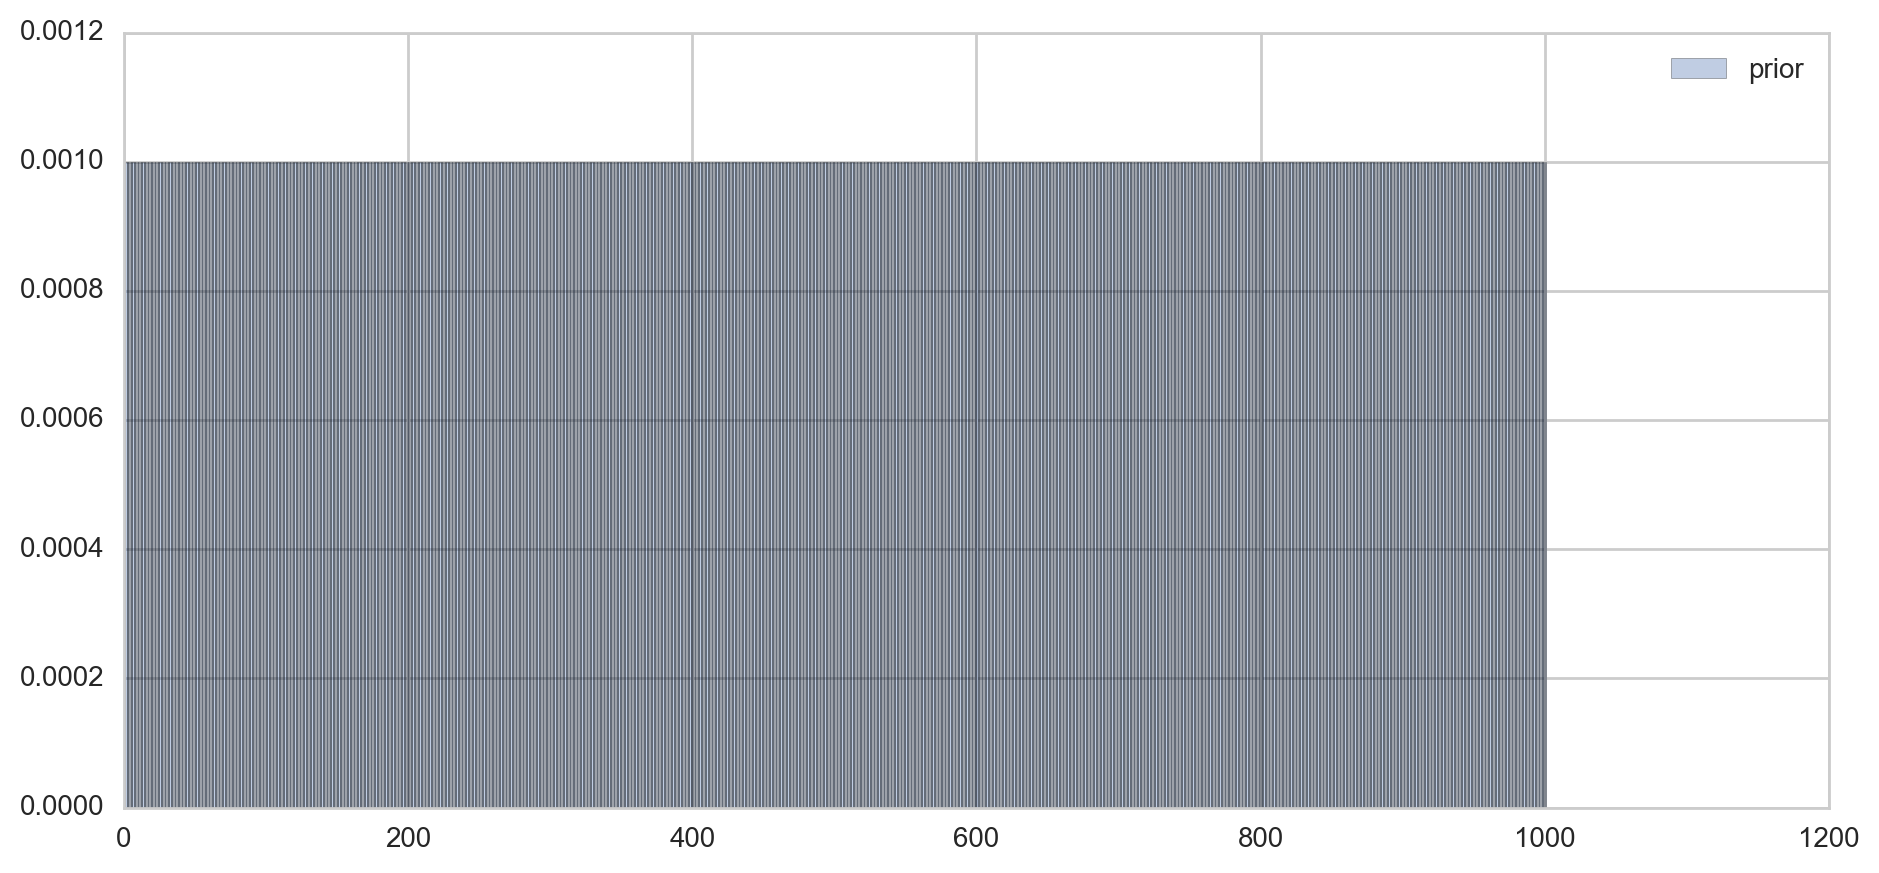

In [30]:
# "uniform prior"
fig, ax = plt.subplots(figsize=(11,5))
ax.bar(np.arange(len(prior)), prior, alpha=0.35, label='prior')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(prior) + np.max(prior) *.2])
plt.show()

formula:
    
### $$ P(\text{total trains} = N | \text{observed} = x) = \frac{P\text{observed} = x \;|\; \text{total trains} = N)}{P(\text{observed} = x) $$

In [31]:
observed = 60

def likelihood(observed, total_trains):
    if observed > total_trains:
        return 0.0
    else:
        return 1./total_trains
    
    
    

In [32]:
likes = np.array([likelihood(observed, n) for n in range(len(prior))])
print likes

[ 0.          0.          0.         ...,  0.00098328  0.00098232
  0.00098135]


(0, 0.02)

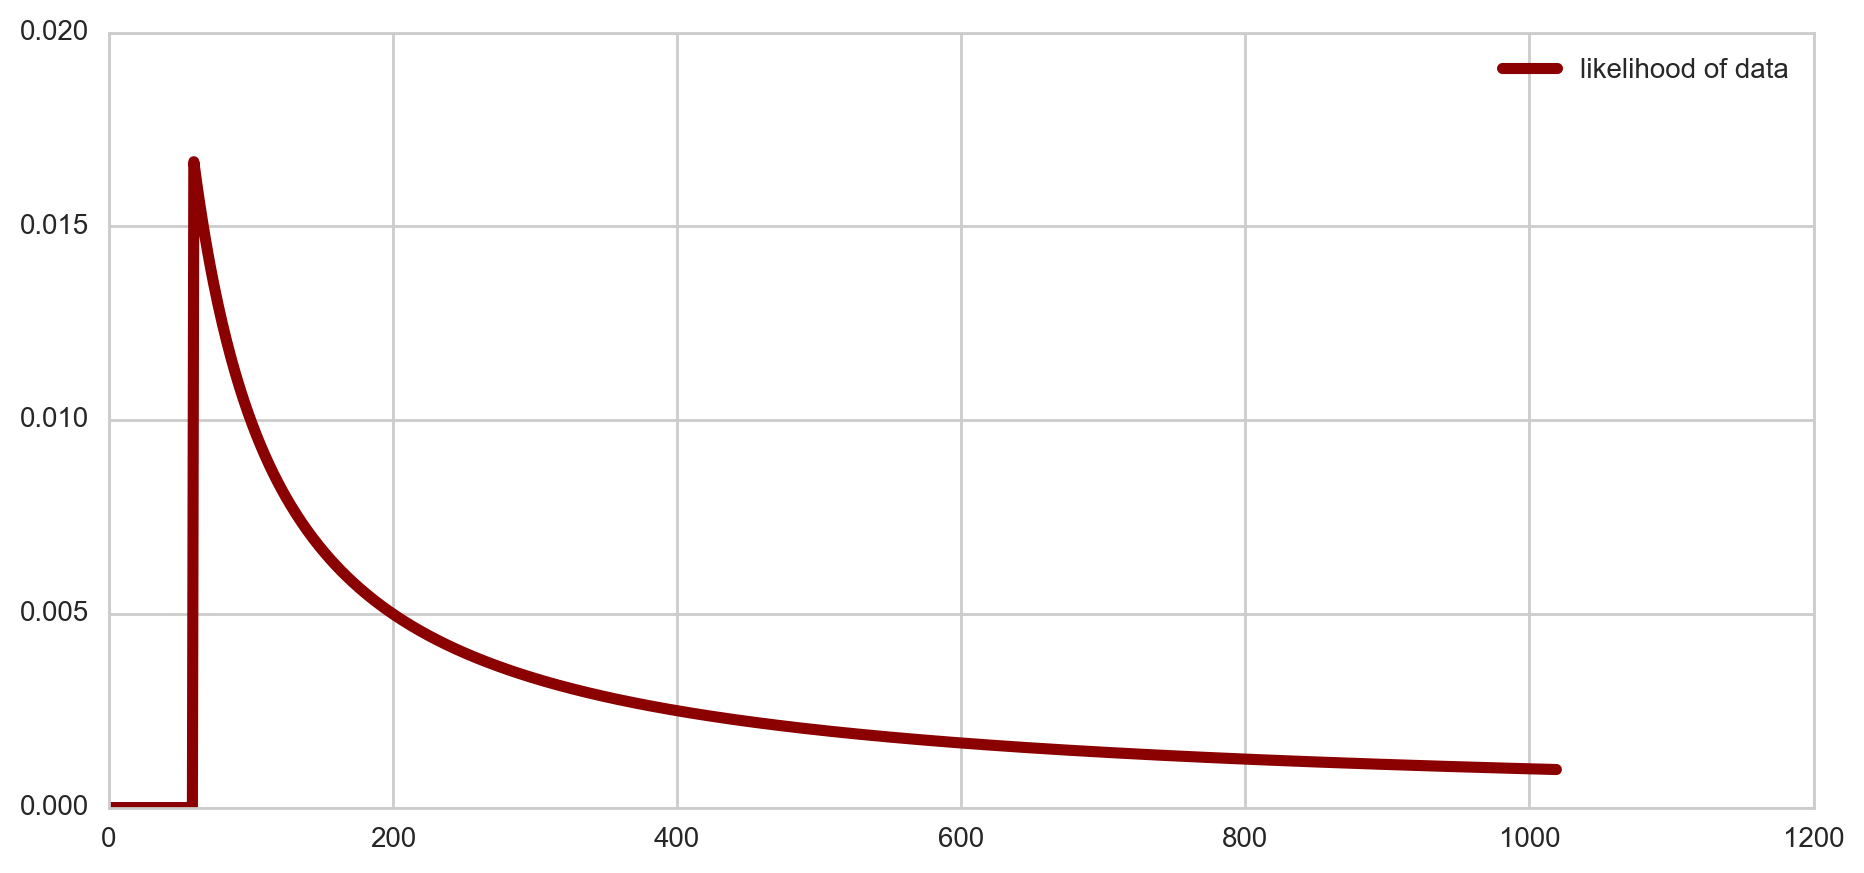

In [33]:
fig, ax = plt.subplots(figsize=(11,5))
ax.plot(np.arange(len(likes)), likes, lw=4, color='darkred', label='likelihood of data')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(likes) + np.max(likes)*.2])

In [34]:
np.sum(likes)

2.8410795487189562

(0, 0.02)

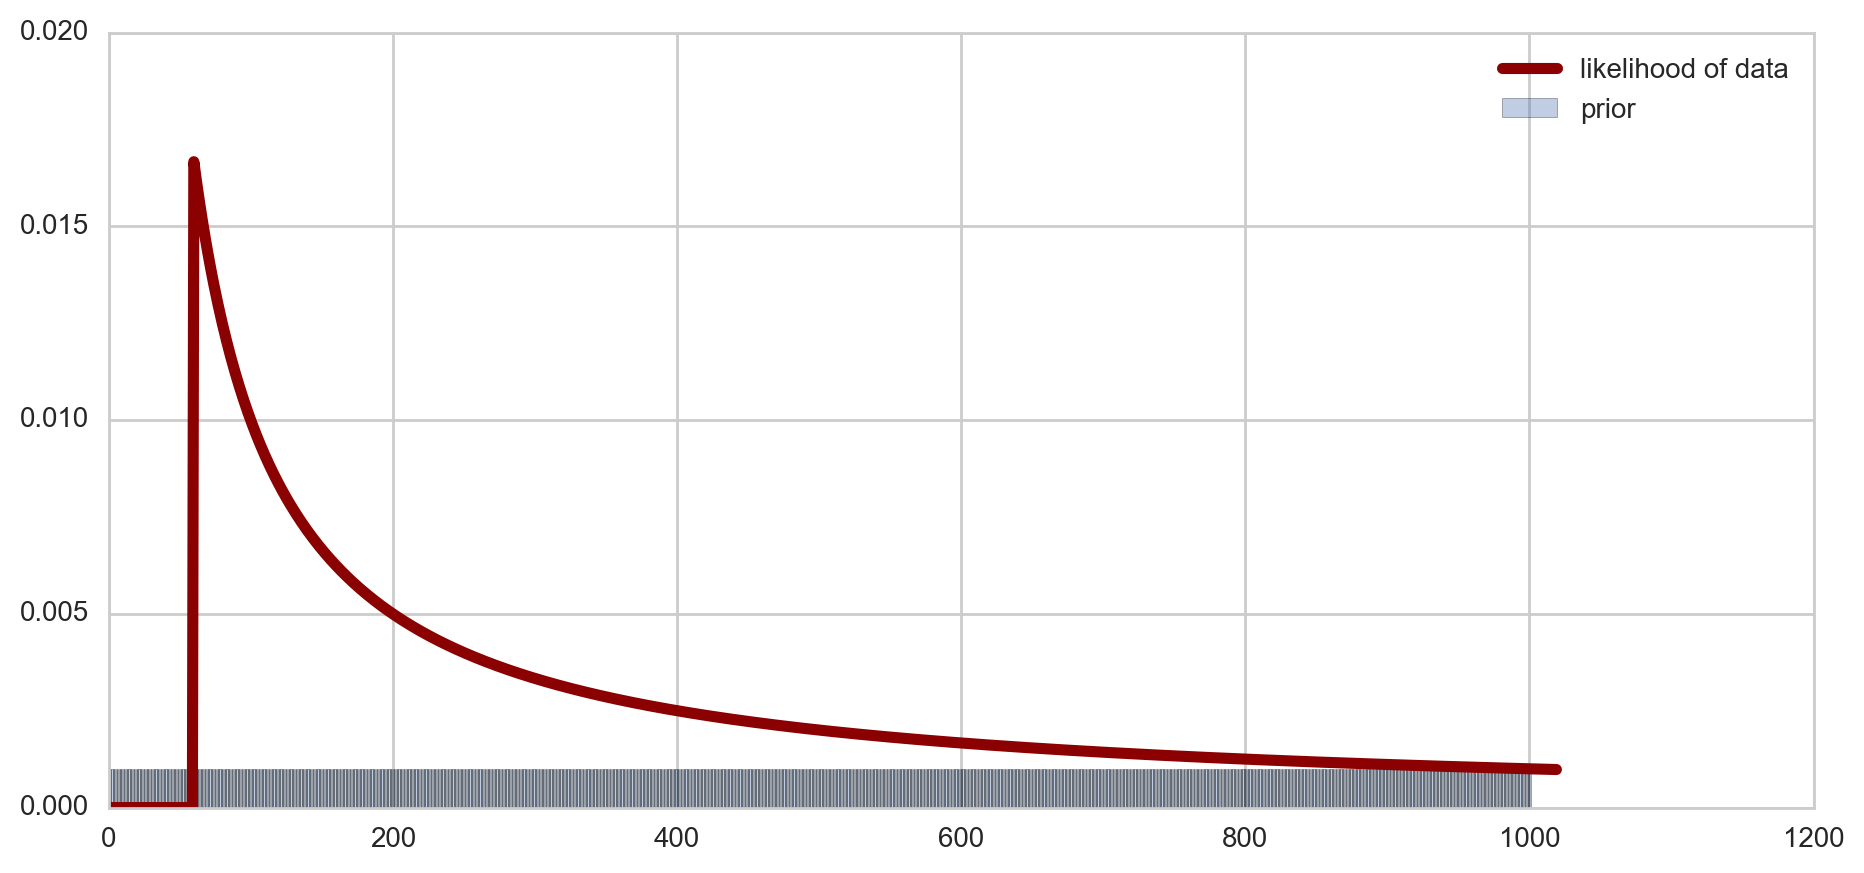

In [35]:
# "uniform prior"
fig, ax = plt.subplots(figsize=(11,5))
ax.bar(np.arange(len(prior)), prior, alpha=0.35, label='prior')
ax.plot(np.arange(len(likes)), likes, lw=4, color='darkred', label='likelihood of data')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(likes) + np.max(likes)*.2])

In [36]:
like_prior = np.array([lk * pr for lk, pr in zip(likes, prior)])
print np.sum(like_prior)
like_prior

0.00282226711427


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

(0, 2.0000000000000002e-05)

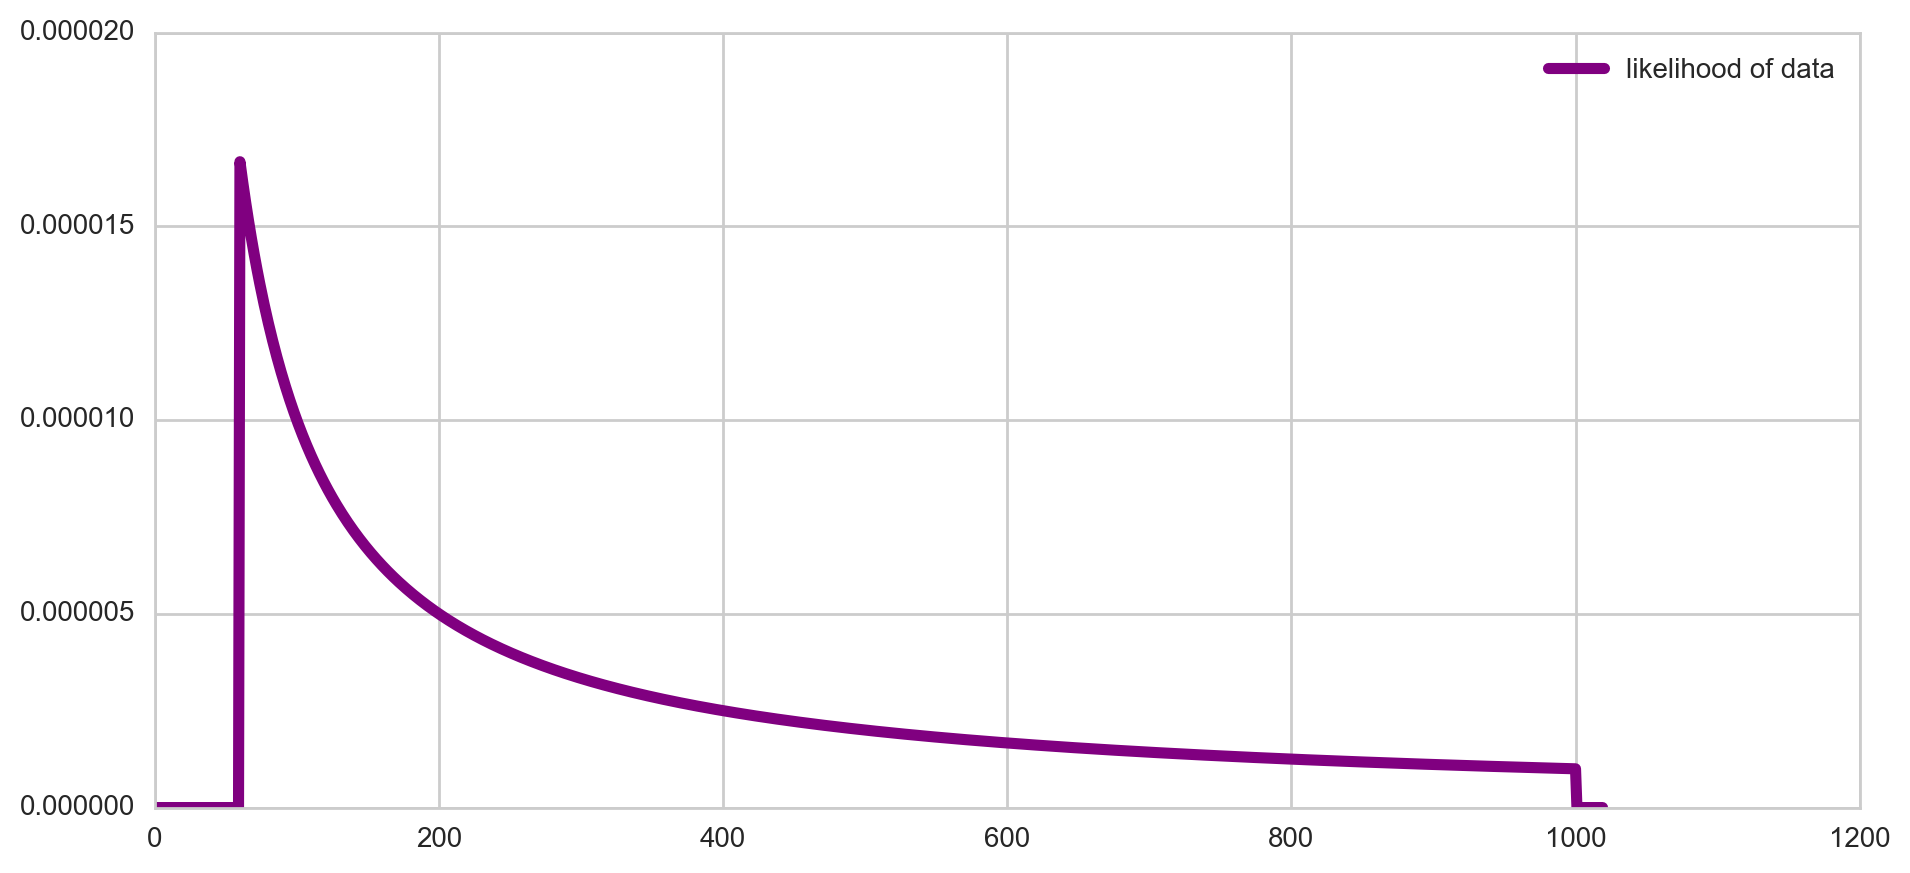

In [37]:
fig, ax = plt.subplots(figsize=(11,5))
ax.plot(np.arange(len(likes)), like_prior, lw=4, color='purple', label='likelihood of data')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(like_prior) + np.max(like_prior)*.2])

In [38]:
# remember monty hall: (car behind one of 3 doors, then we pick a door, then he opens a door) 

In [39]:
marginal = np.sum(like_prior)

In [40]:
marginal

0.0028222671142652737

In [41]:
posterior = np.array([lp / marginal for lp in like_prior])
posterior

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [42]:
np.sum(posterior)

1.0

(0, 0.0070865014508758283)

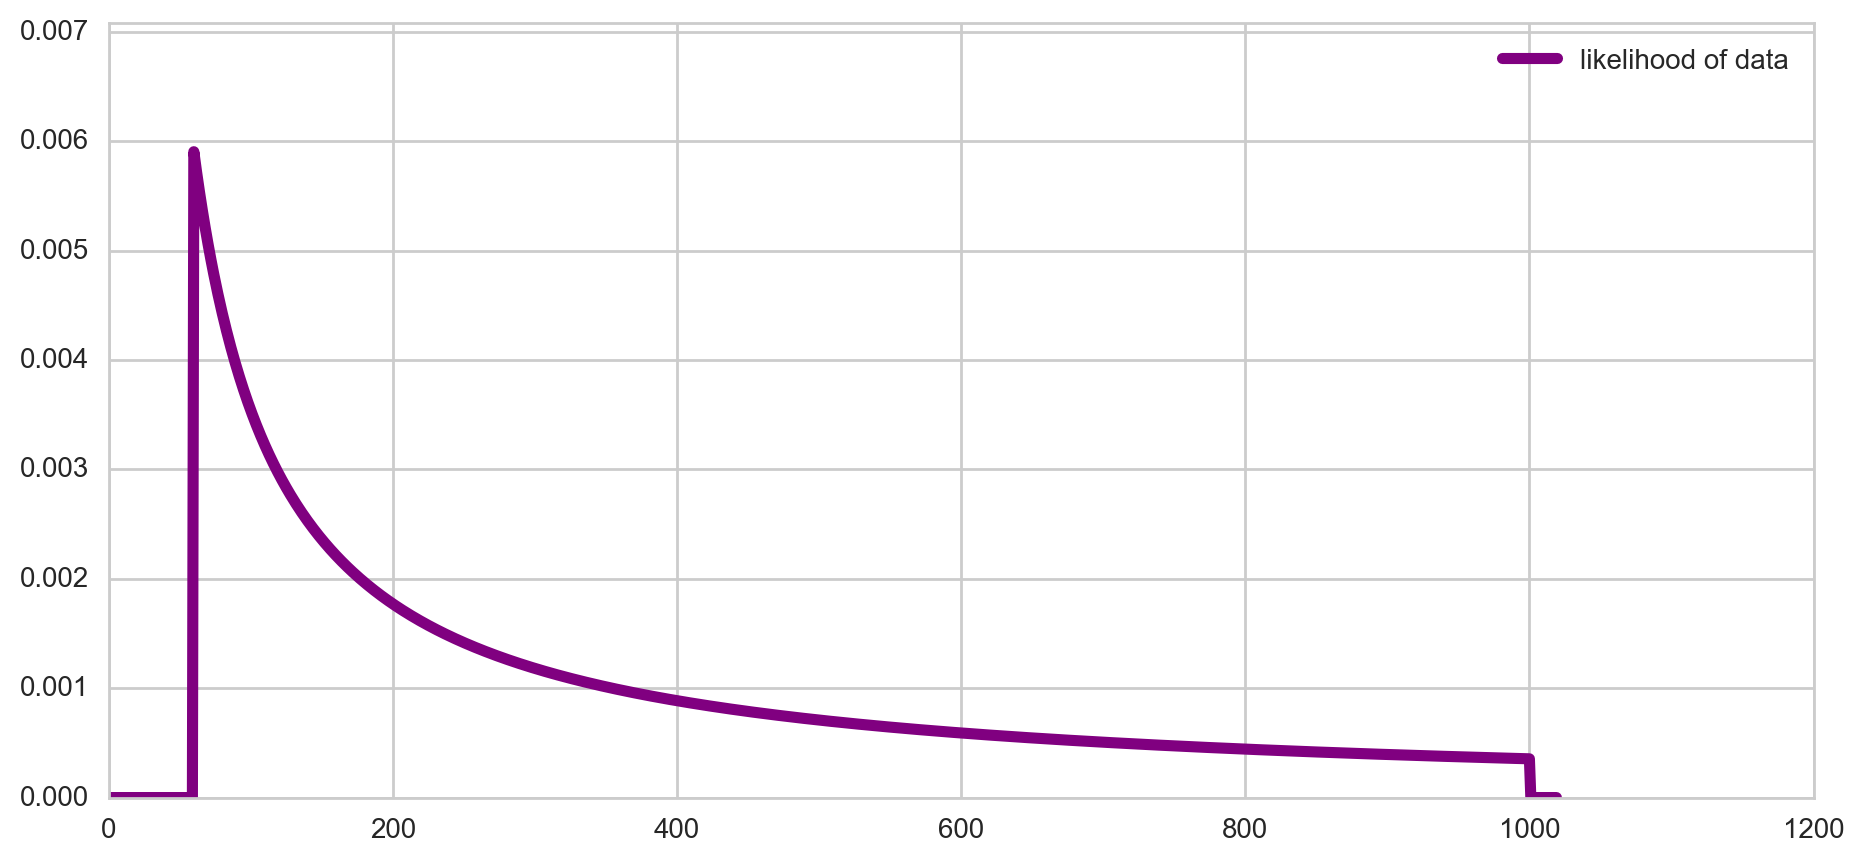

In [43]:
fig, ax = plt.subplots(figsize=(11,5))
ax.plot(np.arange(len(posterior)), posterior, lw=4, color='purple', label='likelihood of data')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(posterior) + np.max(posterior)*.2])

## Dungeons & Dragons Dice Problem 1

There are five dice: a 4-sided die, 6-sided die, 8-sided die, 12-sided die, 20-sided die. You roll a 6. The problem is to predict which die was thrown.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood. Identify which die you believe to be the thrown die and how likely this is to be the thrown die.

In [45]:
base = 1/5 # there's 5 dice
#but we know that it can't be one, so it means we really only have 4 dice
# on the 4 sided die, 0
# on the 6 sided die, 1/6 1*1/5
# on the 8 sided die, 1/8
# on the 12 sided die, 1/12
# on the 20 sided die, 1/20


In [46]:
# P(die = D4 | roll = 6) = 0

# P(die = D12 | roll = 6) = (P(roll = 6 | die = D12)) * P(D12)) / P(roll = 6)
# P(die = D6 | roll = 6) = (1/6 * 1/5) / P(roll = 6)
# P(die = D8 | roll = 6) = (1/8 * 1/5) / P(roll = 6)
# P(die = D12 | roll = 6) = (1/12 * 1/5) / P(roll = 6)
# P(die = D20 | roll = 6) = (1/20 * 1/5) / P(roll = 6)

# P(roll = 6) = (1/6 * 1/5) + (1/8 * 1/5) + (1/12 * 1/5) + (1/20 * 1/5)

In [47]:
marginal = (1./6 * 1./5) + (1./8 * 1./5) + (1./12 * 1./5) + (1./20 * 1./5)
marginal

0.08499999999999999

In [48]:
pD6 = (1./6 * 1./5)/marginal
pD6

0.3921568627450981

In [49]:
pD20 = (1./20 * 1./5)/marginal

In [50]:
pD20

0.11764705882352942

## Dungeons & Dragons Dice Problem 2

There are five dice: a 4-sided die, 6-sided die, 8-sided die, 12-sided die, 20-sided die. You roll the same die and get a 6, 4, 8, 7, 5, 7. The problem is to predict which die was thrown.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood. Identify which die you believe to be the thrown die and how likely this is to be the thrown die.

In [ ]:
# data: rolls = {6,4,8,7,5,7}

# P(die = D12 | roll = {6,4,8,7,5,7}) = (P(roll = {6,4,8,7,5,7} | die = D12)) * P(D12)) / P(roll = {6,4,8,7,5,7})

# likelihood: (1/12)**6

## M&M Problem

You have two bags of M&Ms. The first bag, created before 1995, has the following color distribution: 30% brown, 20% yellow, 20% red, 10% orange, 10% green, 10% tan. The second bag, created after 1995, has the following color distribution: 24% blue, 20% green, 16% orange, 14% yellow, 12% red, 12% brown.

From one bag, you pull a yellow M&M. The problem is to predict from which bag you pulled the yellow M&M.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, the likelihood.

Consider the yellow M&M already pulled (so this is part of your data). From the other bag, you pull a green M&M. Update your posterior appropriately and update your answer to the problem.

In [54]:
#PART 1:
#H1: bag #1 is pre-1995, bag #2 is post-1995
#H2: bag #1 is post-1995, bag #2 is pre-1995

#data : 1 yellow M&M picked from a bag
# P(bag 1 pre-95 | yellow from bag 1) = P(yellow from bag 1 | bag 1 pre-95) * P(bag 1 pre-95)
# ... = 0.2 * 0.5

#P(bag 2 pre-95 | yellow from bag 1) = ...
# ... = 0.14 *0.5

In [55]:
h1_like = 0.2 * 0.5
h2_like = 0.14 * 0.5
marginal = h1_like + h2_like
print h1_like, h2_like, marginal

0.1 0.07 0.17


In [56]:
print h1_like/marginal, h2_like/marginal

0.588235294118 0.411764705882


In [57]:
# new prior H1 = 0.588
# new prior H2 = 0.412

In [58]:
# P(H1 | green from b2, yellow from b1) = likelihood * prior
# likelihood = P(green from b2 | H1 i.e. bag 1 is pre-95, yellow from bag 1)
# prior = P(H1 i.e. bag 1 is pre-95 | yellow from bag 1) = 0.2 * 0.5 = 0.1
# ... = 0.2 * 0.1

# 


# P(H2 | green from b2, yellow from b1) = likelihood * prior
# likelihood = P(green from b2 | bag 2 is pre-95, yellow from bag 1) = 0.1
# prior = P(bag 2 is pre-95 | yellow from bag 1) = 0.07
#... = 0.1 * 0.07

In [60]:
new_h1_like = 0.2 * 0.1
new_h2_like = 0.1 * 0.07
marginal = new_h1_like + new_h2_like
print new_h1_like, new_h2_like, marginal
print new_h1_like/marginal, new_h2_like/marginal

0.02 0.007 0.027
0.740740740741 0.259259259259
